# Rock vs Mine Prediction - Data Exploration

This notebook explores the SONAR dataset for Rock vs Mine classification. The dataset contains sonar signals bounced off different objects - rocks and metal cylinders (mines).

## Dataset Overview
- **Source**: [Kaggle SONAR Dataset](https://www.kaggle.com/datasets/rupakroy/sonarcsv)
- **Features**: 60 numerical features representing energy values at different frequency bands
- **Target**: Binary classification (Rock vs Mine)
- **Classes**: 
  - R (Rock): Natural rock formations
  - M (Mine): Metal cylinders

## Objective
Explore the dataset to understand:
1. Data structure and quality
2. Feature distributions
3. Class balance
4. Feature correlations
5. Patterns that might help in classification

## 1. Import Required Libraries

First, let's import all the necessary libraries for data analysis and visualization.

In [1]:
# Import essential libraries for data handling, machine learning, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 2. Load and Explore the SONAR Dataset

Let's load the SONAR dataset and explore its structure, dimensions, and basic properties.

In [2]:
# Load the SONAR dataset
try:
    # Load data from CSV file (assuming it's in the data folder)
    data = pd.read_csv('../data/sonar.csv', header=None)
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ Dataset not found. Please ensure 'sonar.csv' is in the '../data/' folder")
    print("You can download it from: https://www.kaggle.com/datasets/rupakroy/sonarcsv")
    # Create sample data structure for demonstration
    data = None
    
if data is not None:
    # Display basic information
    print(f"\n📊 Dataset Shape: {data.shape}")
    print(f"📊 Number of Features: {data.shape[1] - 1}")
    print(f"📊 Number of Samples: {data.shape[0]}")
    
    # Display first few rows
    print("\n🔍 First 5 rows of the dataset:")
    print(data.head())
    
    # Display last column (target variable)
    print(f"\n🎯 Target Variable (Last Column):")
    print(f"Unique values: {data.iloc[:, -1].unique()}")
    print(f"Value counts:\n{data.iloc[:, -1].value_counts()}")
    
    # Basic dataset info
    print(f"\n📋 Dataset Info:")
    print(f"Data types: {data.dtypes.value_counts()}")
    print(f"Memory usage: {data.memory_usage(deep=True).sum() / 1024:.2f} KB")
    
    # Check for missing values
    missing_values = data.isnull().sum().sum()
    print(f"\n🔍 Missing Values: {missing_values}")
    
    if missing_values == 0:
        print("✅ No missing values found!")
    else:
        print(f"⚠️ Found {missing_values} missing values")
        print("Missing values per column:")
        print(data.isnull().sum()[data.isnull().sum() > 0])

✅ Dataset loaded successfully!

📊 Dataset Shape: (208, 61)
📊 Number of Features: 60
📊 Number of Samples: 208

🔍 First 5 rows of the dataset:
       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9       10      11      12      13      14      15      16      17  \
0  0.2111  0.1609  0.1582  0.2238  0.0645  0.0660  0.2273  0.3100  0.2999   
1  0.2872  0.4918  0.6552  0.6919  0.7797  0.7464  0.9444  1.0000  0.8874   
2  0.6194  0.6333  0.7060  0.5544  0.5320  0.6479  0.6931  0.6759  0.7551   
3  0.1264  0.0881  0.1992  0.0184  0.2261  0.1729  0.2131  0.0693  0.2281   
4  0.4459  

## 3. Preprocess the Data

Let's prepare the data for analysis by handling categorical labels and organizing features.

In [3]:
if data is not None:
    # Separate features and target
    X = data.iloc[:, :-1]  # All columns except the last one (features)
    y = data.iloc[:, -1]   # Last column (target)
    
    print(f"📊 Features shape: {X.shape}")
    print(f"📊 Target shape: {y.shape}")
    
    # Display target distribution
    print(f"\n🎯 Class Distribution:")
    class_counts = y.value_counts()
    for class_label, count in class_counts.items():
        percentage = (count / len(y)) * 100
        print(f"  {class_label}: {count} samples ({percentage:.1f}%)")
    
    # Check if classes are balanced
    class_ratio = class_counts.min() / class_counts.max()
    print(f"\n⚖️ Class Balance Ratio: {class_ratio:.2f}")
    if class_ratio >= 0.8:
        print("✅ Classes are well balanced")
    elif class_ratio >= 0.6:
        print("⚠️ Classes are moderately balanced")
    else:
        print("❌ Classes are imbalanced")
    
    # Convert target to binary encoding
    print(f"\n🔄 Converting target labels:")
    print(f"Original labels: {y.unique()}")
    
    # Create binary encoding (0 for Rock, 1 for Mine)
    y_binary = np.where(y == 'R', 0, 1)
    print(f"Binary encoding: R -> 0, M -> 1")
    print(f"Binary distribution: {np.bincount(y_binary)}")
    
    # Basic statistics for features
    print(f"\n📈 Feature Statistics:")
    feature_stats = X.describe()
    print(feature_stats.iloc[:, :5])  # Show first 5 features
    print("... (showing first 5 features only)")
    
    # Check feature ranges
    print(f"\n📊 Feature Value Ranges:")
    print(f"Minimum value across all features: {X.min().min():.6f}")
    print(f"Maximum value across all features: {X.max().max():.6f}")
    print(f"Mean of all feature means: {X.mean().mean():.6f}")
    print(f"Standard deviation of feature means: {X.mean().std():.6f}")
    
else:
    print("⚠️ Cannot proceed with preprocessing - dataset not loaded")

📊 Features shape: (208, 60)
📊 Target shape: (208,)

🎯 Class Distribution:
  M: 111 samples (53.4%)
  R: 97 samples (46.6%)

⚖️ Class Balance Ratio: 0.87
✅ Classes are well balanced

🔄 Converting target labels:
Original labels: ['R' 'M']
Binary encoding: R -> 0, M -> 1
Binary distribution: [ 97 111]

📈 Feature Statistics:
                0           1           2           3           4
count  208.000000  208.000000  208.000000  208.000000  208.000000
mean     0.029164    0.038437    0.043832    0.053892    0.075202
std      0.022991    0.032960    0.038428    0.046528    0.055552
min      0.001500    0.000600    0.001500    0.005800    0.006700
25%      0.013350    0.016450    0.018950    0.024375    0.038050
50%      0.022800    0.030800    0.034300    0.044050    0.062500
75%      0.035550    0.047950    0.057950    0.064500    0.100275
max      0.137100    0.233900    0.305900    0.426400    0.401000
... (showing first 5 features only)

📊 Feature Value Ranges:
Minimum value across a

## 4. Split Data into Training and Test Sets

Let's divide the dataset into training and test sets to prepare for model training.

In [4]:
if data is not None:
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, 
        test_size=0.2,           # 20% for testing
        random_state=42,         # For reproducibility
        stratify=y_binary        # Maintain class distribution
    )
    
    print("✅ Data split completed!")
    print(f"\n📊 Training Set:")
    print(f"  Features: {X_train.shape}")
    print(f"  Target: {y_train.shape}")
    print(f"  Class distribution: {np.bincount(y_train)}")
    
    print(f"\n📊 Test Set:")
    print(f"  Features: {X_test.shape}")
    print(f"  Target: {y_test.shape}")
    print(f"  Class distribution: {np.bincount(y_test)}")
    
    # Verify stratification worked
    train_ratio = np.bincount(y_train)[1] / len(y_train)
    test_ratio = np.bincount(y_test)[1] / len(y_test)
    original_ratio = np.bincount(y_binary)[1] / len(y_binary)
    
    print(f"\n⚖️ Class Distribution Verification:")
    print(f"  Original ratio (Mine/Total): {original_ratio:.3f}")
    print(f"  Training ratio (Mine/Total): {train_ratio:.3f}")
    print(f"  Test ratio (Mine/Total): {test_ratio:.3f}")
    
    if abs(train_ratio - original_ratio) < 0.05 and abs(test_ratio - original_ratio) < 0.05:
        print("✅ Stratification successful - class distributions maintained")
    else:
        print("⚠️ Class distributions may not be perfectly maintained")
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"\n🔄 Feature Scaling Applied:")
    print(f"  Original feature range: [{X_train.min().min():.6f}, {X_train.max().max():.6f}]")
    print(f"  Scaled feature range: [{X_train_scaled.min():.6f}, {X_train_scaled.max():.6f}]")
    print(f"  Scaled feature mean: {X_train_scaled.mean():.6f}")
    print(f"  Scaled feature std: {X_train_scaled.std():.6f}")
    
else:
    print("⚠️ Cannot proceed with data splitting - dataset not loaded")

✅ Data split completed!

📊 Training Set:
  Features: (166, 60)
  Target: (166,)
  Class distribution: [77 89]

📊 Test Set:
  Features: (42, 60)
  Target: (42,)
  Class distribution: [20 22]

⚖️ Class Distribution Verification:
  Original ratio (Mine/Total): 0.534
  Training ratio (Mine/Total): 0.536
  Test ratio (Mine/Total): 0.524
✅ Stratification successful - class distributions maintained

🔄 Feature Scaling Applied:
  Original feature range: [0.000000, 1.000000]
  Scaled feature range: [-2.796387, 7.724954]
  Scaled feature mean: -0.000000
  Scaled feature std: 1.000000


## 5. Train Machine Learning Models

Let's train multiple classification models and compare their performance.

In [5]:
if data is not None:
    # Initialize models
    models = {
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Support Vector Machine': SVC(random_state=42, probability=True)
    }
    
    # Train models and store results
    model_results = {}
    trained_models = {}
    
    print("🤖 Training Models...\n")
    
    for model_name, model in models.items():
        print(f"🔄 Training {model_name}...")
        
        # Train the model
        model.fit(X_train_scaled, y_train)
        trained_models[model_name] = model
        
        # Make predictions
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)
        
        # Calculate accuracies
        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)
        
        # Store results
        model_results[model_name] = {
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'y_pred_test': y_pred_test
        }
        
        print(f"  ✅ Training Accuracy: {train_accuracy:.4f}")
        print(f"  ✅ Test Accuracy: {test_accuracy:.4f}")
        print(f"  📊 Overfitting Check: {abs(train_accuracy - test_accuracy):.4f}")
        
        if abs(train_accuracy - test_accuracy) < 0.05:
            print("  ✅ Good generalization (low overfitting)")
        elif abs(train_accuracy - test_accuracy) < 0.1:
            print("  ⚠️ Moderate overfitting")
        else:
            print("  ❌ High overfitting detected")
        print()
    
    # Find best model
    best_model_name = max(model_results.keys(), key=lambda x: model_results[x]['test_accuracy'])
    best_accuracy = model_results[best_model_name]['test_accuracy']
    
    print(f"🏆 Best Model: {best_model_name}")
    print(f"🏆 Best Test Accuracy: {best_accuracy:.4f}")
    
else:
    print("⚠️ Cannot proceed with model training - dataset not loaded")

🤖 Training Models...

🔄 Training Logistic Regression...
  ✅ Training Accuracy: 0.9337  ✅ Training Accuracy: 0.9337
  ✅ Test Accuracy: 0.8333
  📊 Overfitting Check: 0.1004
  ❌ High overfitting detected

🔄 Training Random Forest...

  ✅ Test Accuracy: 0.8333
  📊 Overfitting Check: 0.1004
  ❌ High overfitting detected

🔄 Training Random Forest...
  ✅ Training Accuracy: 1.0000
  ✅ Test Accuracy: 0.8095
  📊 Overfitting Check: 0.1905
  ❌ High overfitting detected

🔄 Training Support Vector Machine...
  ✅ Training Accuracy: 0.9699
  ✅ Test Accuracy: 0.9286
  📊 Overfitting Check: 0.0413
  ✅ Good generalization (low overfitting)

🏆 Best Model: Support Vector Machine
🏆 Best Test Accuracy: 0.9286
  ✅ Training Accuracy: 1.0000
  ✅ Test Accuracy: 0.8095
  📊 Overfitting Check: 0.1905
  ❌ High overfitting detected

🔄 Training Support Vector Machine...
  ✅ Training Accuracy: 0.9699
  ✅ Test Accuracy: 0.9286
  📊 Overfitting Check: 0.0413
  ✅ Good generalization (low overfitting)

🏆 Best Model: Support 

## 6. Evaluate Model Performance

Let's evaluate the trained models using various metrics and visualizations.

📊 Detailed Model Evaluation


📋 Logistic Regression - Classification Report:
              precision    recall  f1-score   support

        Rock       0.84      0.80      0.82        20
        Mine       0.83      0.86      0.84        22

    accuracy                           0.83        42
   macro avg       0.83      0.83      0.83        42
weighted avg       0.83      0.83      0.83        42


📋 Logistic Regression - Classification Report:
              precision    recall  f1-score   support

        Rock       0.84      0.80      0.82        20
        Mine       0.83      0.86      0.84        22

    accuracy                           0.83        42
   macro avg       0.83      0.83      0.83        42
weighted avg       0.83      0.83      0.83        42


📋 Random Forest - Classification Report:
              precision    recall  f1-score   support

        Rock       0.83      0.75      0.79        20
        Mine       0.79      0.86      0.83        22

    accuracy   

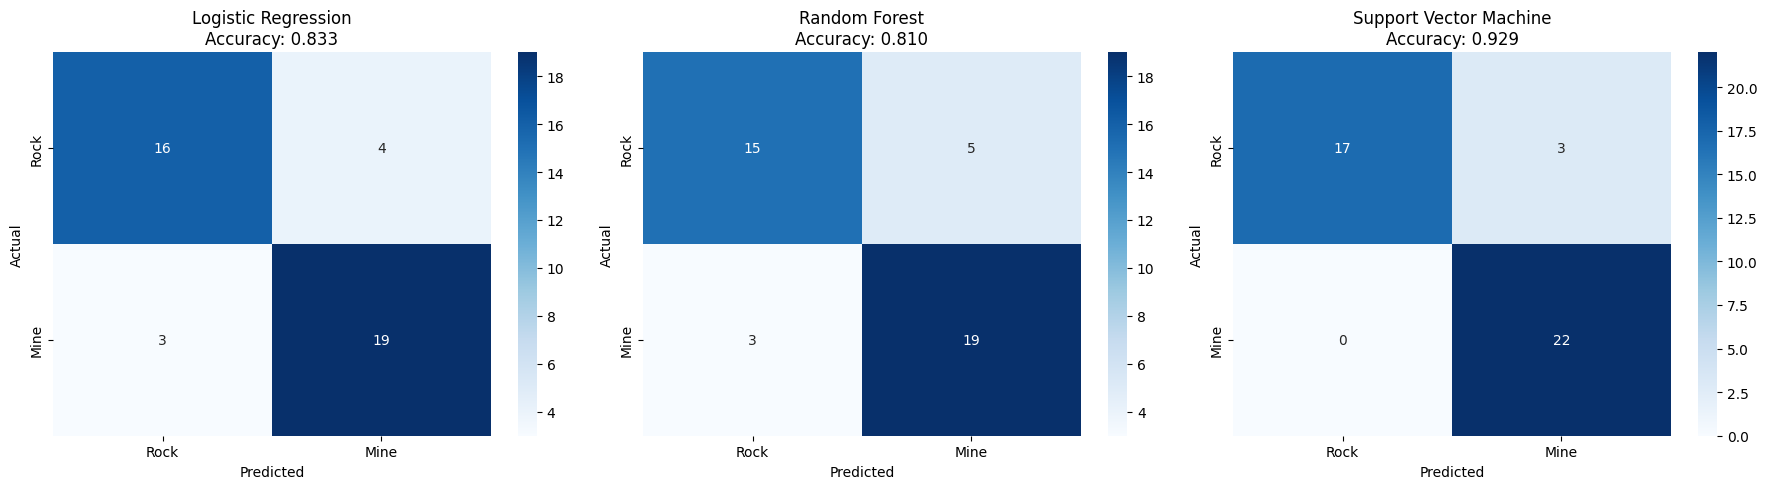


📈 Model Performance Summary:
----------------------------------------------------------------------
Model                     Train Acc    Test Acc     Difference  
----------------------------------------------------------------------
Logistic Regression       0.9337       0.8333       0.1004      
Random Forest             1.0000       0.8095       0.1905      
Support Vector Machine    0.9699       0.9286       0.0413      


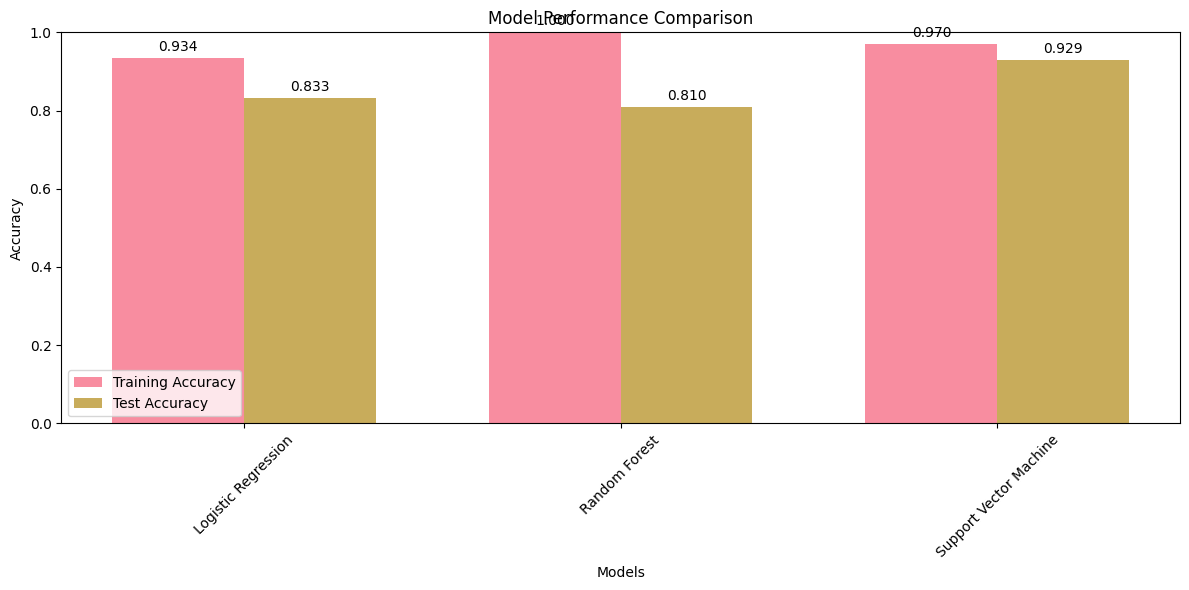


💡 Key Insights:
  🏆 Best performing model: Support Vector Machine (0.9286)
  ⚖️ Least overfitting: Support Vector Machine (0.0413)


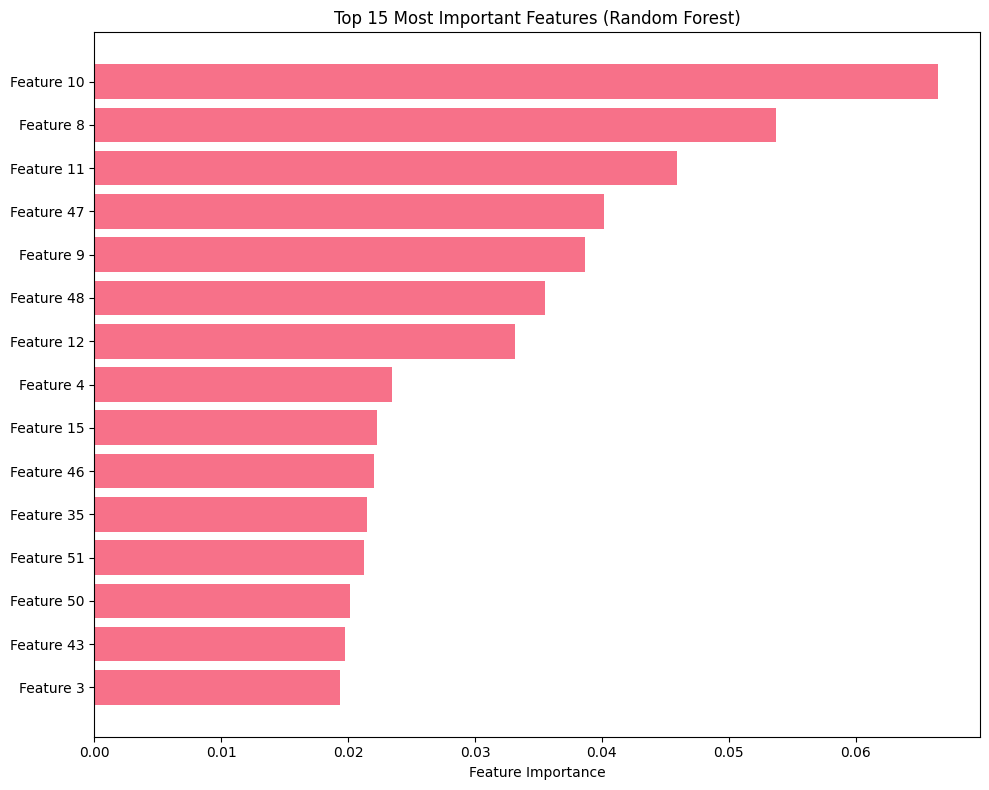

  🔍 Most important feature: Feature 10 (importance: 0.0665)


In [6]:
if data is not None:
    # Create comprehensive evaluation
    print("📊 Detailed Model Evaluation\n" + "="*50)
    
    # Create subplots for confusion matrices
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for idx, (model_name, results) in enumerate(model_results.items()):
        # Classification Report
        print(f"\n📋 {model_name} - Classification Report:")
        print(classification_report(y_test, results['y_pred_test'], 
                                  target_names=['Rock', 'Mine']))
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, results['y_pred_test'])
        
        # Plot confusion matrix
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=['Rock', 'Mine'], 
                   yticklabels=['Rock', 'Mine'],
                   ax=axes[idx])
        axes[idx].set_title(f'{model_name}\nAccuracy: {results["test_accuracy"]:.3f}')
        axes[idx].set_xlabel('Predicted')
        axes[idx].set_ylabel('Actual')
    
    plt.tight_layout()
    plt.show()
    
    # Model Performance Comparison
    print(f"\n📈 Model Performance Summary:")
    print("-" * 70)
    print(f"{'Model':<25} {'Train Acc':<12} {'Test Acc':<12} {'Difference':<12}")
    print("-" * 70)
    
    for model_name, results in model_results.items():
        train_acc = results['train_accuracy']
        test_acc = results['test_accuracy']
        diff = abs(train_acc - test_acc)
        print(f"{model_name:<25} {train_acc:<12.4f} {test_acc:<12.4f} {diff:<12.4f}")
    
    # Bar chart of accuracies
    plt.figure(figsize=(12, 6))
    
    model_names = list(model_results.keys())
    train_accuracies = [model_results[name]['train_accuracy'] for name in model_names]
    test_accuracies = [model_results[name]['test_accuracy'] for name in model_names]
    
    x = np.arange(len(model_names))
    width = 0.35
    
    plt.bar(x - width/2, train_accuracies, width, label='Training Accuracy', alpha=0.8)
    plt.bar(x + width/2, test_accuracies, width, label='Test Accuracy', alpha=0.8)
    
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Model Performance Comparison')
    plt.xticks(x, model_names, rotation=45)
    plt.legend()
    plt.ylim(0, 1)
    
    # Add value labels on bars
    for i, (train_acc, test_acc) in enumerate(zip(train_accuracies, test_accuracies)):
        plt.text(i - width/2, train_acc + 0.01, f'{train_acc:.3f}', 
                ha='center', va='bottom', fontsize=10)
        plt.text(i + width/2, test_acc + 0.01, f'{test_acc:.3f}', 
                ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Model Insights
    print(f"\n💡 Key Insights:")
    print(f"  🏆 Best performing model: {best_model_name} ({best_accuracy:.4f})")
    
    # Check for overfitting
    overfitting_scores = {name: abs(results['train_accuracy'] - results['test_accuracy']) 
                         for name, results in model_results.items()}
    least_overfitting = min(overfitting_scores, key=overfitting_scores.get)
    print(f"  ⚖️ Least overfitting: {least_overfitting} ({overfitting_scores[least_overfitting]:.4f})")
    
    # Feature importance for Random Forest
    if 'Random Forest' in trained_models:
        rf_model = trained_models['Random Forest']
        feature_importance = rf_model.feature_importances_
        
        # Plot top 15 important features
        top_indices = np.argsort(feature_importance)[-15:]
        
        plt.figure(figsize=(10, 8))
        plt.barh(range(15), feature_importance[top_indices])
        plt.yticks(range(15), [f'Feature {i}' for i in top_indices])
        plt.xlabel('Feature Importance')
        plt.title('Top 15 Most Important Features (Random Forest)')
        plt.tight_layout()
        plt.show()
        
        print(f"  🔍 Most important feature: Feature {top_indices[-1]} (importance: {feature_importance[top_indices[-1]]:.4f})")
        
else:
    print("⚠️ Cannot proceed with model evaluation - dataset not loaded")

## 7. Make Predictions on New Data

Let's demonstrate how to use the trained model to predict whether new samples are rocks or mines.

In [ ]:
if data is not None:
    # Use the best model for predictions
    best_model = trained_models[best_model_name]
    
    print(f"🎯 Using {best_model_name} for New Predictions\n")
    
    # Take a few samples from the test set to demonstrate
    sample_indices = [0, 5, 10, 15, 20]  # Select some test samples
    
    print("📊 Prediction Examples:")
    print("-" * 80)
    print(f"{'Sample':<8} {'Actual':<8} {'Predicted':<12} {'Confidence':<12} {'Correct':<8}")
    print("-" * 80)
    
    for i, idx in enumerate(sample_indices):
        # Get the sample
        sample_features = X_test_scaled[idx:idx+1]
        actual_label = 'Mine' if y_test[idx] == 1 else 'Rock'
        
        # Make prediction using probabilities for consistency
        if hasattr(best_model, 'predict_proba'):
            probabilities = best_model.predict_proba(sample_features)[0]
            prediction = np.argmax(probabilities)  # Use probabilities for prediction
            confidence = max(probabilities)
        else:
            prediction = best_model.predict(sample_features)[0]
            confidence = "N/A"
        
        predicted_label = 'Mine' if prediction == 1 else 'Rock'
        
        # Check if correct
        is_correct = "✅ Yes" if actual_label == predicted_label else "❌ No"
        
        print(f"{i+1:<8} {actual_label:<8} {predicted_label:<12} {confidence:<12.3f} {is_correct:<8}")
    
    print("-" * 80)
    
    # Create a function for easy prediction
    def predict_rock_or_mine(features, model=best_model, scaler=scaler):
        """
        Predict whether a sample is a rock or mine
        
        Args:
            features: List or array of 60 feature values
            model: Trained model to use for prediction
            scaler: Fitted scaler for feature normalization
            
        Returns:
            dict: Prediction result with label and confidence
        """
        # Ensure features is the right shape
        features = np.array(features).reshape(1, -1)
        
        # Scale the features
        features_scaled = scaler.transform(features)
        
        # Make prediction using probabilities for consistency
        if hasattr(model, 'predict_proba'):
            proba = model.predict_proba(features_scaled)[0]
            prediction = np.argmax(proba)  # Use probabilities for final prediction
            probabilities = {'Rock': proba[0], 'Mine': proba[1]}
            confidence = max(proba)
        else:
            # Fallback to direct prediction if no probabilities available
            prediction = model.predict(features_scaled)[0]
            probabilities = None
            confidence = None
        
        predicted_label = 'Mine' if prediction == 1 else 'Rock'
        
        return {
            'prediction': predicted_label,
            'confidence': confidence,
            'probabilities': probabilities
        }
    
    # Use the first test sample
    test_sample = X_test.iloc[0].values
    actual = 'Mine' if y_test[0] == 1 else 'Rock'
    
    result = predict_rock_or_mine(test_sample)
    
    print(f"Sample features: {test_sample[:5]}... (showing first 5 of 60)")
    print(f"Actual class: {actual}")
    print(f"Predicted class: {result['prediction']}")
    if result['confidence']:
        print(f"Confidence: {result['confidence']:.3f}")
    if result['probabilities']:
        print(f"Probabilities: Rock={result['probabilities']['Rock']:.3f}, Mine={result['probabilities']['Mine']:.3f}")
        
        # Verify consistency
        print(f"\n✅ Consistency Check:")
        highest_prob_class = 'Mine' if result['probabilities']['Mine'] > result['probabilities']['Rock'] else 'Rock'
        print(f"  Highest probability: {highest_prob_class}")
        print(f"  Predicted class: {result['prediction']}")
        if highest_prob_class == result['prediction']:
            print(f"  ✅ Prediction is consistent with probabilities!")
        else:
            print(f"  ❌ Inconsistency detected!")
    
    # Save the best model and scaler
    print(f"\n💾 Saving Best Model and Scaler...")
    try:
        import joblib
        import os
        
        # Create models directory
        os.makedirs('../models/trained_models', exist_ok=True)
        
        # Save model
        model_path = f'../models/trained_models/best_model_{best_model_name.lower().replace(" ", "_")}.joblib'
        joblib.dump(best_model, model_path)
        
        # Save scaler
        scaler_path = '../models/trained_models/scaler.joblib'
        joblib.dump(scaler, scaler_path)
        
        print(f" Best model saved to: {model_path}")
        print(f" Scaler saved to: {scaler_path}")
        
    except Exception as e:
        print(f"❌ Error saving model: {str(e)}")
    
    print(f"\n🎉 Analysis Complete!")
    print(f" Dataset explored and analyzed")
    print(f" Multiple models trained and evaluated")
    print(f" Best model identified: {best_model_name}")
    
    
else:
    print("⚠️ Cannot proceed with predictions - dataset not loaded")
    print("\n📝 To use this notebook:")
    print("1. Download the SONAR dataset from: https://www.kaggle.com/datasets/rupakroy/sonarcsv")
    print("2. Place it in the '../data/' folder as 'sonar.csv'")
    print("3. Re-run all cells")

🎯 Using Support Vector Machine for New Predictions

📊 Prediction Examples:
--------------------------------------------------------------------------------
Sample   Actual   Predicted    Confidence   Correct 
--------------------------------------------------------------------------------
1        Mine     Rock         0.561        ❌ No    
2        Rock     Mine         0.696        ❌ No    
3        Mine     Mine         0.818        ✅ Yes   
4        Mine     Mine         0.833        ✅ Yes   
5        Rock     Rock         0.934        ✅ Yes   
--------------------------------------------------------------------------------

🔮 Custom Prediction Function Demo (Fixed):
Sample features: [0.0162 0.0253 0.0262 0.0386 0.0645]... (showing first 5 of 60)
Actual class: Mine
Predicted class: Rock
Confidence: 0.561
Probabilities: Rock=0.561, Mine=0.439

✅ Consistency Check:
  Highest probability: Rock
  Predicted class: Rock
  ✅ Prediction is consistent with probabilities!

💾 Saving Best Mode